In [8]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import StandardScaler

In [11]:
def TrainModel_better(filepath):
    #scaler = StandardScaler()
    print('Training based on data in:',filepath)
    #Read in the training data
    trainSet = pd.read_json(filepath+'\TrainSet.json')
    #Make X and y sets from training set
    y = trainSet['label']
    X = trainSet.drop(['label'],axis=1)
    #scaler.fit_transform(X)
    #Train the model
    print("Training Model...")
    svc = svm.SVC()
    #should be 2^-5 to 2^15 but I do not have time to train it
    c = [2**x for x in range(-5,15)]
    #should be 2^-15 to 2^4 but I do not have time to train it
    gamma = [2**x for x in range(-15,4)]
    parameters = {'C': c, 'gamma' : gamma, 'kernel': ('rbf', 'sigmoid')}
    clf = GridSearchCV(svc,parameters,verbose=1)
    GridSearchResults = clf.fit(X,y)
    print("Best params found by gridsearch:\n", GridSearchResults.best_params_)
    print("Best estimator found by gridsearch:\n", GridSearchResults.best_estimator_)
    #Read in the testing data
    testSet = pd.read_json(filepath+'\TestSet.json')
    #Make X and y sets from testing set
    y_true = testSet['label']
    X_test = testSet.drop(['label'],axis=1)
    #scaler.transform(X_test)
    y_pred = clf.predict(X_test)
    #evaluation 1
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    print('accuracy score of ',accuracy_score(y_true, y_pred))
    print('percision score of ',precision_score(y_true, y_pred, average=None))
    #export model with pickle for later use
    import pickle
    pickle.dump(clf, open(filepath+r"\classifier_better.sav", 'wb'))

In [2]:
def TrainModel(filepath):
    #scaler = StandardScaler()
    print('Training based on data in:',filepath)
    #Read in the training data
    trainSet = pd.read_json(filepath+'\TrainSet.json')
    #Make X and y sets from training set
    y = trainSet['label']
    X = trainSet.drop(['label'],axis=1)
    #scaler.fit_transform(X)
    #Train the model
    print("Training Model...")
    svc = svm.SVC()
    #should be 2^-5 to 2^15 but I do not have time to train it
    c = [2**x for x in range(-5,15)]
    #should be 2^-15 to 2^4 but I do not have time to train it
    #gamma = [2**x for x in range(-6,4)]
    parameters = {'C': c, 'kernel': ('rbf', 'sigmoid')}
    clf = GridSearchCV(svc,parameters,verbose=1)
    GridSearchResults = clf.fit(X,y)
    print("Best params found by gridsearch:\n", GridSearchResults.best_params_)
    print("Best estimator found by gridsearch:\n", GridSearchResults.best_estimator_)
    #Read in the testing data
    testSet = pd.read_json(filepath+'\TestSet.json')
    #Make X and y sets from testing set
    y_true = testSet['label']
    X_test = testSet.drop(['label'],axis=1)
    #scaler.transform(X_test)
    y_pred = clf.predict(X_test)
    #evaluation 1
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    print('accuracy score of ',accuracy_score(y_true, y_pred))
    print('percision score of ',precision_score(y_true, y_pred, average=None))
    #export model with pickle for later use
    import pickle
    pickle.dump(clf, open(filepath+r"\classifier.sav", 'wb'))

In [3]:
def PlotTSNE(filepath):
    trainSet = pd.read_json(filepath+'\TrainSet.json')
    y = trainSet['label']
    X = trainSet.drop(['label'],axis=1)
    n_components = 2
    tsne = TSNE(n_components)
    tsne_result = tsne.fit_transform(X)
    tsne_result.shape
    tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
    fig, ax = plt.subplots(1)
    sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
    lim = (tsne_result.min()-5, tsne_result.max()+5)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.show()

In [30]:
def PrintDataSetInformation(filepath):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from collections import Counter
    #The point of this function is to gather some interesting data about each dataset and print it
    nonTargetUsers = pd.read_json(filepath+'\ConcatNonTargetUserComments.json')
    targetUsers = pd.read_json(filepath+'\ConcatTargetUserComments.json')
    dfs=[nonTargetUsers,targetUsers]
    df_label={0:"Non-Target User Dataset", 1:"Target User Dataset"}
    count = 0
    for df in dfs:
        corpus = df['corpus']
        bow = CountVectorizer()
        X = bow.fit(corpus)
        vocabulary = bow.get_feature_names() # Words in the vocabulary 
        X = bow.transform(corpus)
        print('Number of users vs number of unique words in vocabulary for',df_label[count],":",X.shape)
        # Word Frequency 
        frequency = X.toarray().sum(axis=0)
        dict_freq = dict(zip(vocabulary, frequency))
        c = Counter(dict_freq)
        print('Most common words for ',df_label[count],":",c.most_common(100))
        
        #top tdidf score
        vectorizer = TfidfVectorizer()
        #perform the tfid operation
        vectors = vectorizer.fit_transform(df['corpus'].to_list())
        feature_array = np.array(vectorizer.get_feature_names())
        tfidf_sorting = np.argsort(vectors.toarray()).flatten()[::-1]
        n = 50
        top_n = feature_array[tfidf_sorting][:n]
        print(top_n)
        count += 1
        

<h3>10-2017 data<h3>

In [31]:
PrintDataSetInformation(r'Z:\Grad School\ESI5937\Project\DataprepOutput_19-11-2021_19.52.05__2017-10')

Number of users vs number of unique words in vocabulary for Non-Target User Dataset : (434, 28143)
Most common words for  Non-Target User Dataset : [('the', 20019), ('end', 15645), ('start', 15613), ('to', 13249), ('and', 11698), ('it', 9445), ('of', 9082), ('you', 8822), ('that', 8178), ('is', 7361), ('in', 6975), ('for', 4316), ('they', 3623), ('are', 3586), ('not', 3530), ('have', 3437), ('this', 3420), ('but', 3399), ('on', 3296), ('was', 3219), ('with', 3197), ('be', 3074), ('if', 2637), ('my', 2618), ('just', 2604), ('as', 2579), ('like', 2517), ('or', 2512), ('so', 2259), ('your', 2249), ('can', 2181), ('people', 2175), ('at', 2131), ('what', 2122), ('he', 2041), ('do', 1917), ('there', 1899), ('about', 1881), ('all', 1840), ('don', 1835), ('we', 1781), ('would', 1710), ('out', 1615), ('me', 1606), ('one', 1599), ('up', 1579), ('com', 1575), ('when', 1567), ('from', 1554), ('https', 1549), ('an', 1545), ('re', 1508), ('no', 1501), ('how', 1450), ('get', 1443), ('them', 1431), ('

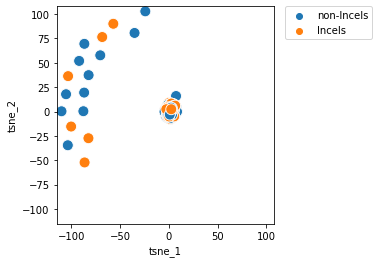

In [20]:
PlotTSNE(r'Z:\Grad School\ESI5937\Project\DataprepOutput_19-11-2021_19.52.05__2017-10')

In [23]:
TrainModel(r'Z:\Grad School\ESI5937\Project\DataprepOutput_19-11-2021_19.52.05__2017-10')

Training based on data in: Z:\Grad School\ESI5937\Project\19-11-2021_19.52.05__2017-10
Training Model...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 40.4min finished


Best params found by gridsearch:
 {'C': 4, 'kernel': 'rbf'}
Best estimator found by gridsearch:
 SVC(C=4)
accuracy score of  0.6609195402298851
percision score of  [0.72368421 0.6122449 ]


<h3>09-2017 data<h3>

In [32]:
PrintDataSetInformation(r'Z:\Grad School\ESI5937\Project\DataprepOutput_20-11-2021_23.15.20__2017-09')

Number of users vs number of unique words in vocabulary for Non-Target User Dataset : (223, 15809)
Most common words for  Non-Target User Dataset : [('the', 6992), ('end', 6160), ('start', 6130), ('to', 4695), ('and', 4137), ('you', 3526), ('it', 3367), ('of', 3115), ('that', 2925), ('is', 2441), ('in', 2438), ('for', 1537), ('was', 1484), ('my', 1433), ('but', 1298), ('on', 1278), ('your', 1269), ('they', 1252), ('not', 1246), ('be', 1162), ('have', 1162), ('are', 1159), ('with', 1143), ('like', 1024), ('just', 1022), ('this', 1013), ('people', 906), ('if', 903), ('as', 848), ('so', 826), ('what', 755), ('me', 719), ('at', 711), ('or', 702), ('about', 696), ('don', 695), ('can', 690), ('he', 680), ('an', 665), ('would', 665), ('we', 661), ('do', 648), ('all', 642), ('out', 627), ('get', 585), ('no', 577), ('there', 570), ('because', 550), ('up', 549), ('one', 531), ('will', 512), ('from', 511), ('think', 505), ('re', 500), ('more', 498), ('time', 483), ('how', 481), ('when', 472), ('b

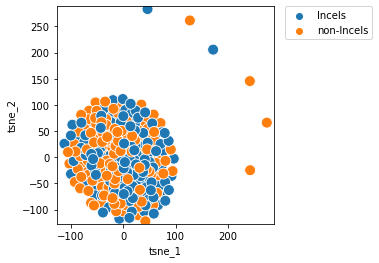

In [6]:
PlotTSNE(r'Z:\Grad School\ESI5937\Project\DataprepOutput_20-11-2021_23.15.20__2017-09')

In [24]:
TrainModel(r'Z:\Grad School\ESI5937\Project\DataprepOutput_20-11-2021_23.15.20__2017-09')

Training based on data in: Z:\Grad School\ESI5937\Project\20-11-2021_23.15.20__2017-09
Training Model...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  7.6min finished


Best params found by gridsearch:
 {'C': 2, 'kernel': 'sigmoid'}
Best estimator found by gridsearch:
 SVC(C=2, kernel='sigmoid')
accuracy score of  0.5955056179775281
percision score of  [0.53488372 0.65217391]


<h3>08-2017 data<h3>

In [33]:
PrintDataSetInformation(r'Z:\Grad School\ESI5937\Project\DataprepOutput_22-11-2021_10.14.38__2017-08')

Number of users vs number of unique words in vocabulary for Non-Target User Dataset : (267, 18567)
Most common words for  Non-Target User Dataset : [('the', 9492), ('end', 8584), ('start', 8560), ('to', 6164), ('and', 5448), ('it', 4596), ('of', 4460), ('you', 4418), ('that', 4061), ('is', 3424), ('in', 3217), ('for', 2046), ('they', 1829), ('but', 1713), ('not', 1686), ('be', 1671), ('was', 1601), ('on', 1586), ('are', 1572), ('with', 1531), ('have', 1473), ('he', 1424), ('if', 1338), ('this', 1287), ('my', 1283), ('just', 1233), ('like', 1218), ('so', 1213), ('as', 1163), ('or', 1118), ('people', 1055), ('can', 1039), ('your', 1031), ('at', 1002), ('about', 1000), ('what', 948), ('don', 945), ('all', 936), ('there', 896), ('do', 860), ('would', 855), ('me', 819), ('one', 794), ('an', 761), ('re', 752), ('we', 749), ('from', 722), ('get', 719), ('because', 704), ('up', 699), ('more', 694), ('out', 691), ('no', 679), ('when', 677), ('their', 647), ('think', 646), ('them', 644), ('who',

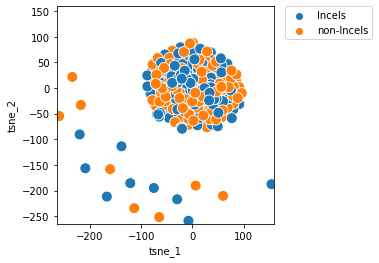

In [7]:
PlotTSNE(r'Z:\Grad School\ESI5937\Project\DataprepOutput_22-11-2021_10.14.38__2017-08')

In [25]:
TrainModel(r'Z:\Grad School\ESI5937\Project\DataprepOutput_22-11-2021_10.14.38__2017-08')

Training based on data in: Z:\Grad School\ESI5937\Project\22-11-2021_10.14.38__2017-08
Training Model...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 11.7min finished


Best params found by gridsearch:
 {'C': 2, 'kernel': 'rbf'}
Best estimator found by gridsearch:
 SVC(C=2)
accuracy score of  0.7289719626168224
percision score of  [0.78       0.68421053]


<h3>07-2017 data<h3>

In [34]:
PrintDataSetInformation(r'Z:\Grad School\ESI5937\Project\DataprepOutput_24-11-2021_17.47.22__2017-07')

Number of users vs number of unique words in vocabulary for Non-Target User Dataset : (198, 14255)
Most common words for  Non-Target User Dataset : [('the', 6582), ('end', 6067), ('start', 6029), ('to', 4284), ('and', 3467), ('it', 3118), ('of', 2864), ('you', 2708), ('that', 2550), ('is', 2231), ('in', 2197), ('for', 1390), ('not', 1208), ('they', 1187), ('but', 1179), ('was', 1140), ('be', 1108), ('have', 1107), ('with', 1052), ('on', 1011), ('this', 994), ('are', 972), ('he', 967), ('if', 926), ('my', 894), ('just', 868), ('like', 843), ('as', 821), ('can', 773), ('or', 773), ('so', 769), ('at', 713), ('what', 666), ('your', 660), ('people', 653), ('about', 613), ('all', 611), ('don', 602), ('there', 597), ('we', 596), ('do', 576), ('out', 550), ('an', 542), ('me', 534), ('would', 531), ('one', 508), ('get', 502), ('when', 495), ('because', 478), ('no', 478), ('from', 477), ('think', 477), ('re', 462), ('up', 457), ('how', 446), ('more', 439), ('his', 426), ('them', 406), ('who', 39

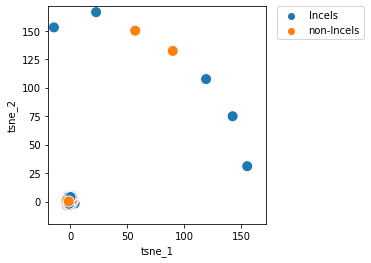

In [9]:
PlotTSNE(r'Z:\Grad School\ESI5937\Project\DataprepOutput_24-11-2021_17.47.22__2017-07')

In [5]:
TrainModel(r'Z:\Grad School\ESI5937\Project\DataprepOutput_24-11-2021_17.47.22__2017-07')

Training based on data in: Z:\Grad School\ESI5937\Project\24-11-2021_17.47.22__2017-07
Training Model...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.9min finished


Best params found by gridsearch:
 {'C': 4, 'kernel': 'sigmoid'}
Best estimator found by gridsearch:
 SVC(C=4, kernel='sigmoid')
accuracy score of  0.6582278481012658
percision score of  [0.70588235 0.62222222]


<h3>06-2017 data<h3>

In [36]:
PrintDataSetInformation(r'Z:\Grad School\ESI5937\Project\DataprepOutput_24-11-2021_19.28.24__2017-06')

Number of users vs number of unique words in vocabulary for Non-Target User Dataset : (194, 14773)
Most common words for  Non-Target User Dataset : [('the', 6962), ('end', 5515), ('start', 5500), ('to', 4471), ('and', 3695), ('you', 3350), ('it', 3130), ('of', 3120), ('that', 2690), ('is', 2566), ('in', 2267), ('for', 1440), ('not', 1254), ('this', 1250), ('are', 1192), ('be', 1183), ('they', 1169), ('but', 1168), ('on', 1153), ('with', 1073), ('was', 1065), ('if', 1063), ('have', 1019), ('as', 986), ('your', 974), ('so', 941), ('he', 933), ('or', 894), ('can', 852), ('like', 840), ('just', 737), ('my', 737), ('at', 731), ('would', 707), ('we', 650), ('what', 643), ('there', 600), ('don', 582), ('about', 570), ('people', 566), ('all', 559), ('do', 550), ('an', 545), ('from', 545), ('out', 506), ('no', 504), ('when', 497), ('more', 489), ('one', 486), ('up', 485), ('them', 478), ('because', 465), ('me', 456), ('re', 440), ('get', 437), ('will', 433), ('their', 425), ('who', 418), ('how'

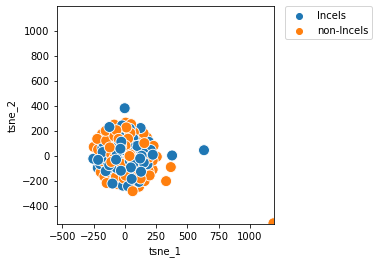

In [10]:
PlotTSNE(r'Z:\Grad School\ESI5937\Project\DataprepOutput_24-11-2021_19.28.24__2017-06')

In [6]:
TrainModel(r'Z:\Grad School\ESI5937\Project\DataprepOutput_24-11-2021_19.28.24__2017-06')

Training based on data in: Z:\Grad School\ESI5937\Project\24-11-2021_19.28.24__2017-06
Training Model...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 12.0min finished


Best params found by gridsearch:
 {'C': 1, 'kernel': 'sigmoid'}
Best estimator found by gridsearch:
 SVC(C=1, kernel='sigmoid')
accuracy score of  0.6025641025641025
percision score of  [0.71428571 0.56140351]


<h3>05-2017 data<h3>

In [37]:
PrintDataSetInformation(r'Z:\Grad School\ESI5937\Project\DataprepOutput_24-11-2021_21.28.57__2017-05')

Number of users vs number of unique words in vocabulary for Non-Target User Dataset : (244, 20151)
Most common words for  Non-Target User Dataset : [('the', 13705), ('end', 8899), ('start', 8856), ('to', 8619), ('and', 6805), ('you', 6576), ('of', 5550), ('it', 5179), ('that', 4818), ('in', 4157), ('is', 3743), ('he', 3051), ('for', 2652), ('was', 2509), ('as', 2150), ('but', 2114), ('they', 2075), ('on', 2048), ('not', 1986), ('with', 1965), ('this', 1926), ('my', 1881), ('be', 1874), ('are', 1810), ('have', 1805), ('just', 1655), ('your', 1574), ('if', 1538), ('like', 1488), ('what', 1458), ('his', 1449), ('so', 1423), ('can', 1382), ('at', 1287), ('or', 1282), ('me', 1275), ('we', 1193), ('all', 1183), ('people', 1144), ('about', 1132), ('do', 1119), ('don', 1117), ('from', 1063), ('out', 1056), ('no', 1019), ('there', 1019), ('one', 1015), ('up', 976), ('him', 974), ('re', 973), ('said', 959), ('would', 937), ('an', 929), ('because', 876), ('how', 873), ('when', 850), ('them', 842)

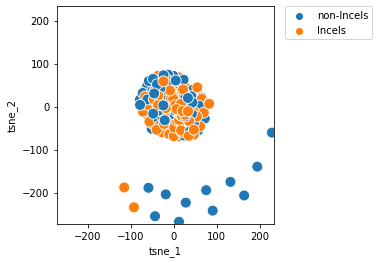

In [11]:
PlotTSNE(r'Z:\Grad School\ESI5937\Project\DataprepOutput_24-11-2021_21.28.57__2017-05')

In [26]:
TrainModel(r'Z:\Grad School\ESI5937\Project\DataprepOutput_24-11-2021_21.28.57__2017-05')

Training based on data in: Z:\Grad School\ESI5937\Project\24-11-2021_21.28.57__2017-05
Training Model...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 11.7min finished


Best params found by gridsearch:
 {'C': 4, 'kernel': 'rbf'}
Best estimator found by gridsearch:
 SVC(C=4)
accuracy score of  0.6632653061224489
percision score of  [0.68888889 0.64150943]
